# Medical Cost Personal Insurance Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the Data Set 

In [2]:
df=pd.read_csv('Medical Cost Personal Insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.shape

(1338, 7)

In [7]:
print('The rows and column in the data set are: ',df.shape)
print('The columns in tha daa set are: ',df.columns)

The rows and column in the data set are:  (1338, 7)
The columns in tha daa set are:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are three different type of data type- int64, object, float64

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

we can see that there are no null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:>

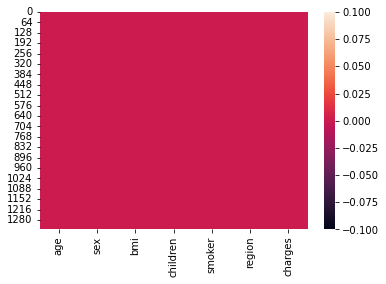

In [11]:
#Visualizing using heatmap
sns.heatmap(df.isnull())

In [12]:
df.nunique().to_frame('No of unique values')

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [13]:
# Checking the value count of each column

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [15]:
print("Total duplicate rows are:",df.duplicated().sum()) 

Total duplicate rows are: 1


In [16]:
#Dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(1337, 7)

In [18]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


We can see that all the data is skewed towards right except the charges colum

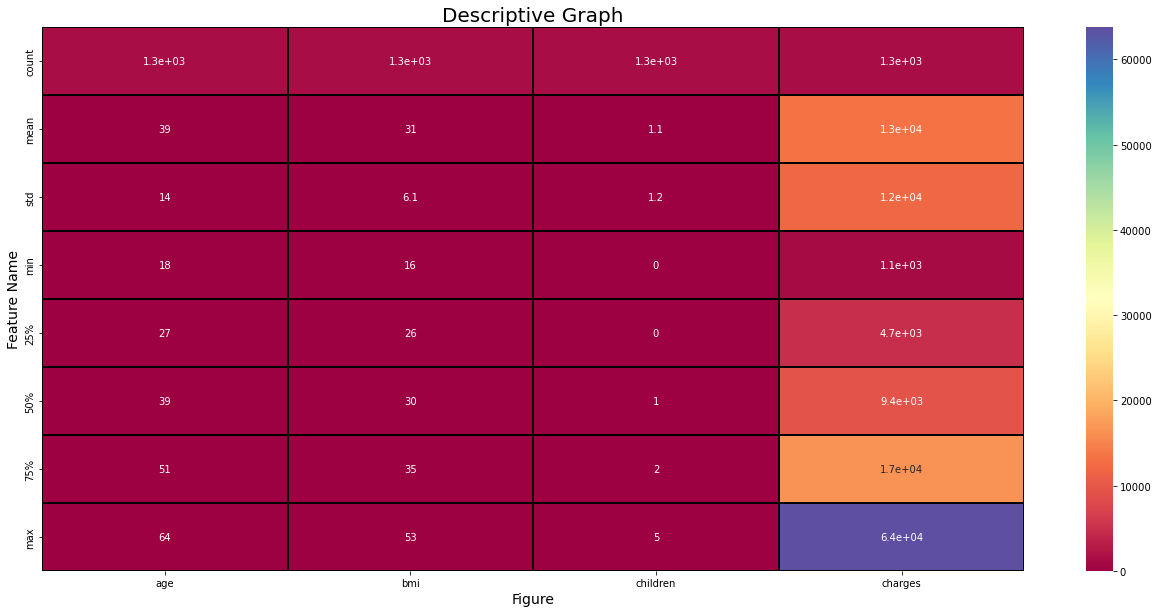

In [19]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Feature Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [20]:
#Seperating Numerical and categorical columns

categorical_col=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:", categorical_col)
print('\n')

numerical_col=[]
for i in df.columns:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:", numerical_col)
print("\n")

Categorical columns are: ['sex', 'smoker', 'region']


Numerical columns are: ['age', 'bmi', 'children', 'charges']




### LMPlot

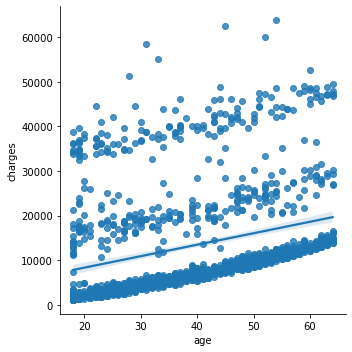

In [21]:
#Creating lmplot of all the the feature variable with the label variable

sns.lmplot(x='age',y='charges',data=df)
plt.show()

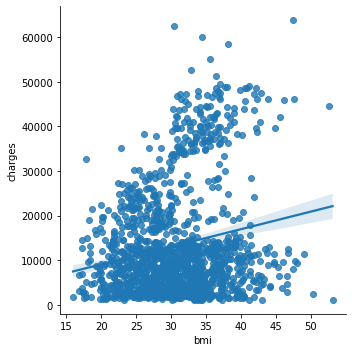

In [22]:
sns.lmplot(x='bmi',y='charges',data=df)
plt.show()

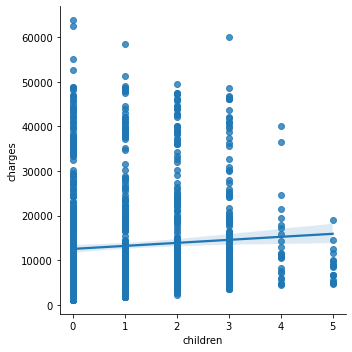

In [23]:
sns.lmplot(x='children',y='charges',data=df)
plt.show()

In [24]:
#This shows that independent features are not in positive correlation with the target variable

### Univariate Analysis

male      675
female    662
Name: sex, dtype: int64


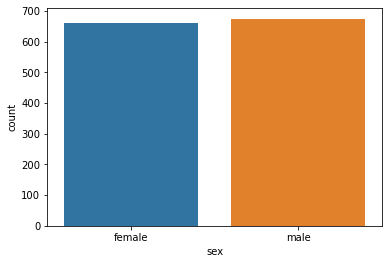

In [25]:
datamap=sns.countplot(df["sex"],data=df)
print(df["sex"].value_counts())

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


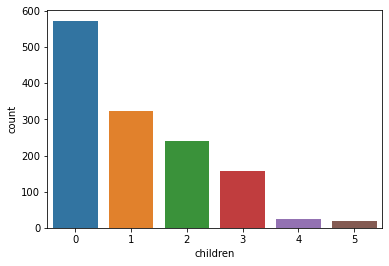

In [26]:
datamap=sns.countplot(df["children"],data=df)
print(df["children"].value_counts())

no     1063
yes     274
Name: smoker, dtype: int64


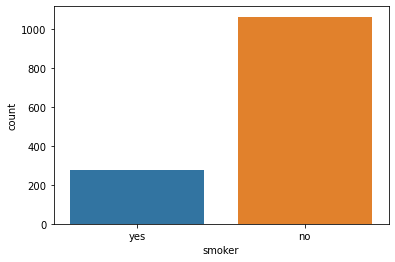

In [27]:
datamap=sns.countplot(df["smoker"],data=df)
print(df["smoker"].value_counts())

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


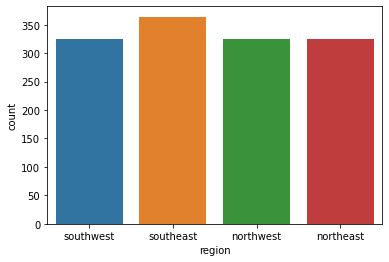

In [28]:
datamap=sns.countplot(df["region"],data=df)
print(df["region"].value_counts())

### Bivariate analysis

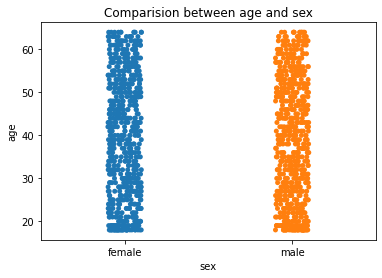

In [29]:
#where we take into consideration 2 columns



plt.title("Comparision between age and sex")
sns.stripplot(x="sex",y="age",data=df)
plt.show()

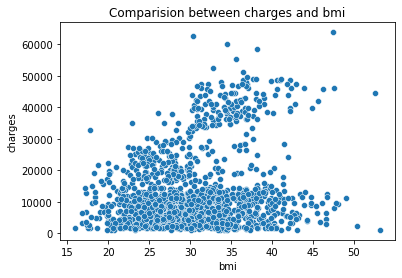

In [30]:
plt.title("Comparision between charges and bmi")
sns.scatterplot(x="bmi",y="charges",data=df)
plt.show()

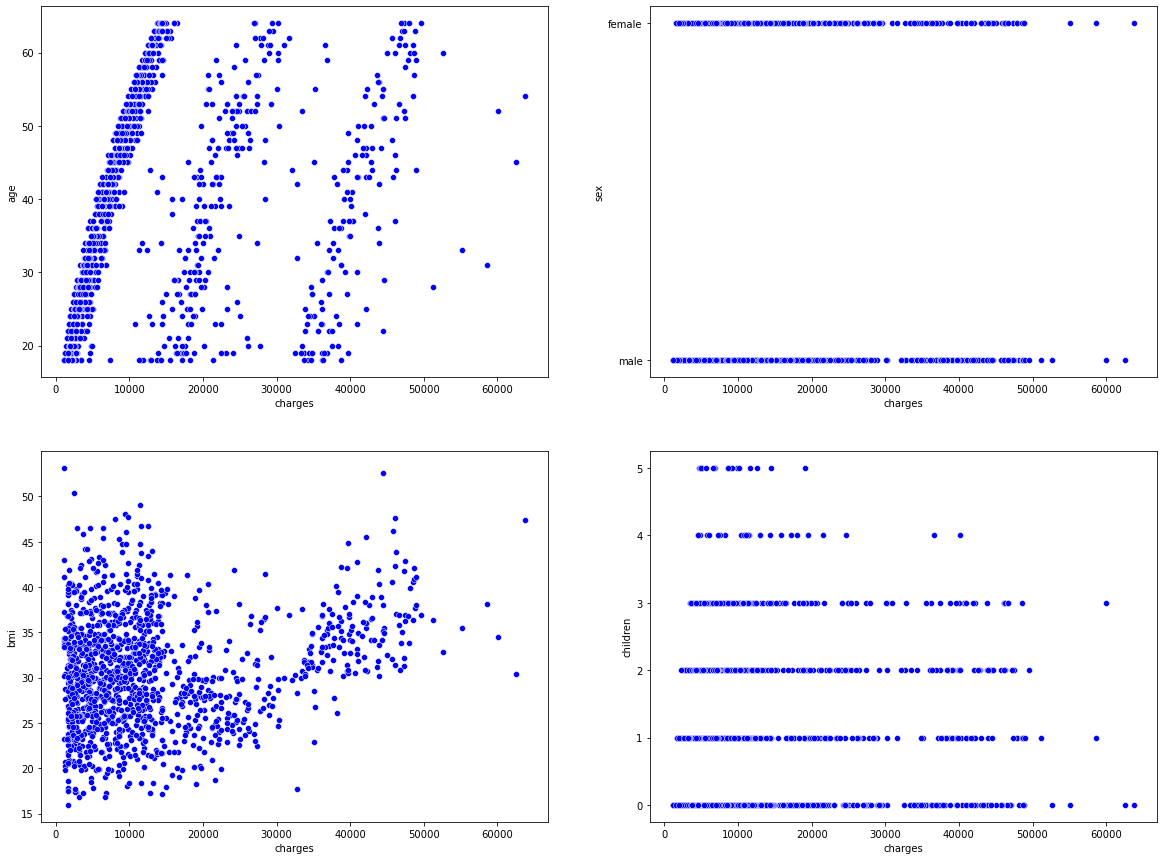

In [31]:
plt.figure(figsize=(20,15))
p=1
for i in df.columns:
    if p<=4:    
        plt.subplot(2,2,p) 
        sns.scatterplot(x='charges',y=i,data=df,color='b')
        plt.xlabel("charges")
        plt.ylabel(i)
    p+=1
plt.show()

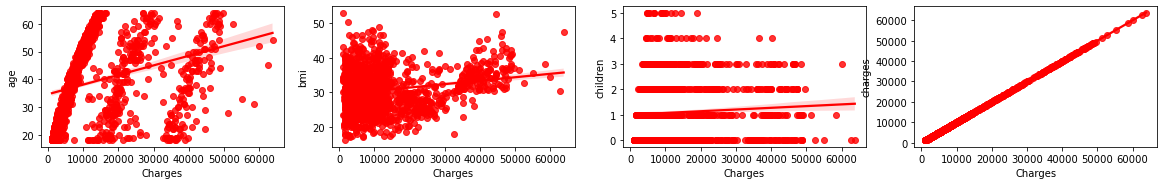

In [32]:
plt.figure(figsize=(20,15))
p=1
for i in numerical_col:
    if p<=5:    
        plt.subplot(5,4,p) 
        sns.regplot(x='charges',y=i,data=df,color='r')
        plt.xlabel("Charges")
        plt.ylabel(i)
    p+=1
plt.show()

In [33]:
#No feature variable share a positive linear relation with the target variable

### Multivariate Analysis

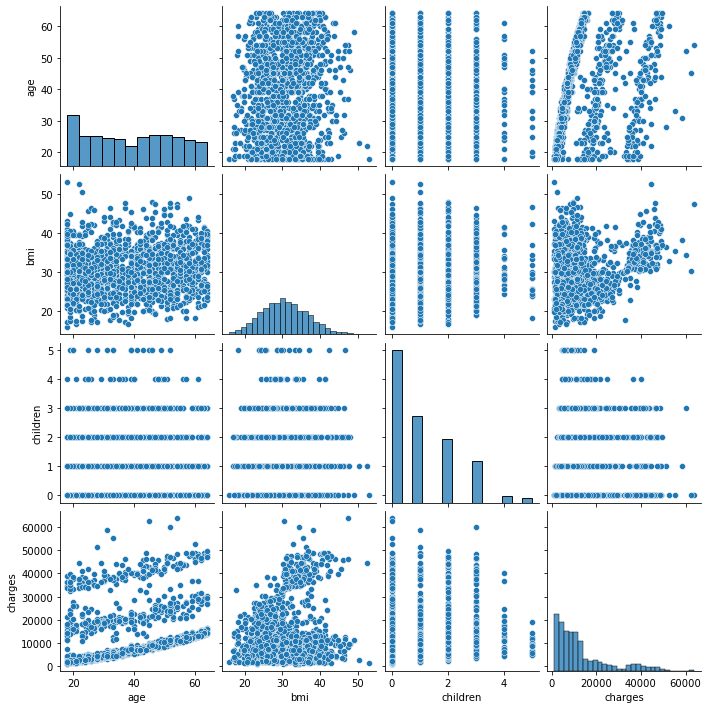

In [34]:
sns.pairplot(data=df,palette='Dark2')
plt.show()

### Outliers

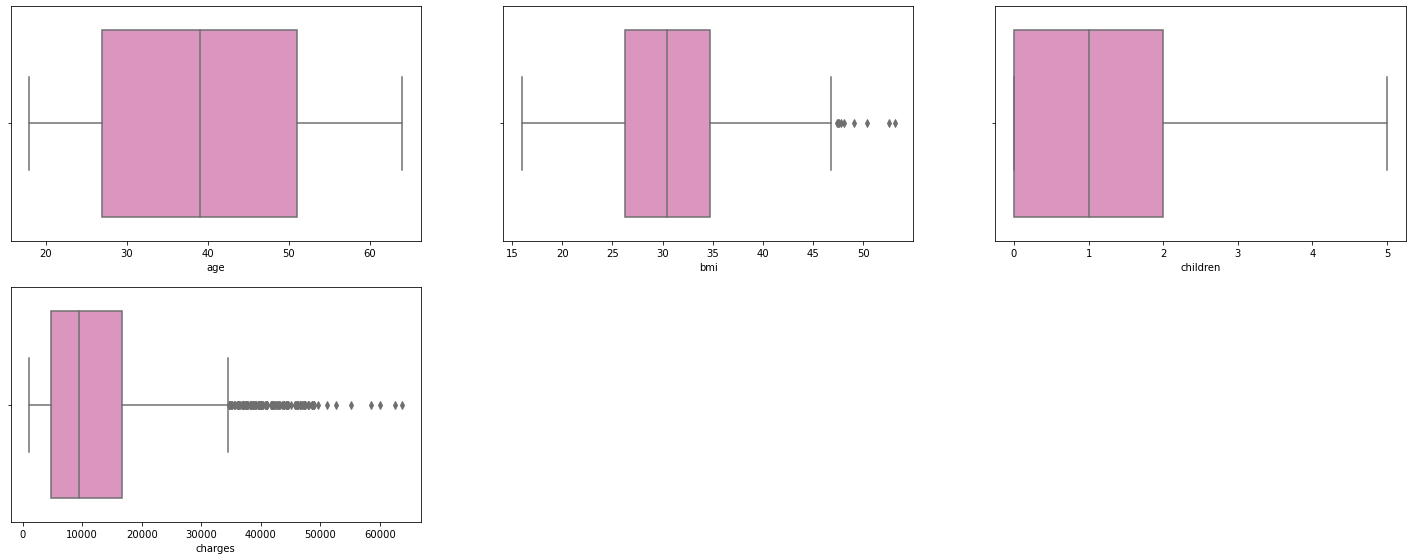

In [35]:
#Let's check the outliers by plotting the boxplot

plt.figure(figsize=(25,25))
p=1
for i in numerical_col:
    if p<=5:
        plt.subplot(5,3,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

Only 'bmi' and 'charges' have outliers. Since we do not remove outliers from the target variable we will go ahead with removing the outliers from only 'bmi'

Two methods to remove outliers are Z score and IQR method. The z-score represents the number of standard deviations that a data point is away from the mean.

## Zscore method

In [36]:
from scipy.stats import zscore
out_features=df[['bmi']]
z=np.abs(zscore(out_features))  
z
# we have applied this method on only 'bmi' because 'charges' column is our target variable

,bmi
0,0.453160
1,0.509422
2,0.383155
3,1.305052
4,0.292456
...,...
1333,0.050269
1334,0.206053
1335,1.014490
1336,0.797524


In [37]:
#threshold=3

np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [38]:
#Now removing the data above Z score and creating a new df

df1=df[(z<3).all(axis=1)]  
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
#Checking the data loss percentage after removing the outliers

print("Data Loss Percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)    #Change in data/original data *100

Data Loss Percentage: 0.2991772625280479


## IQR Method

In [40]:
#Now lets check with IQR method:

#1st Quantile
Q1=out_features.quantile(0.25)

#3rd Quantile
Q3=out_features.quantile(0.75)

IQR=Q3-Q1

df2=df[~((df < (Q1-1.5*IQR))|(df> (Q3+ 1.5*IQR))).any(axis=1)]

In [41]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
print("Data Loss Percentage:", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)    #Change in data/original data *100

Data Loss Percentage: 0.6731488406881078


This means both methods of removing outliers are acceptable. We can go ahead with any one of these. We will choose z score method as its giving less data loss comparatively.

In [43]:
df=df1

### Checking how the data is distributed in each column after removing outliers

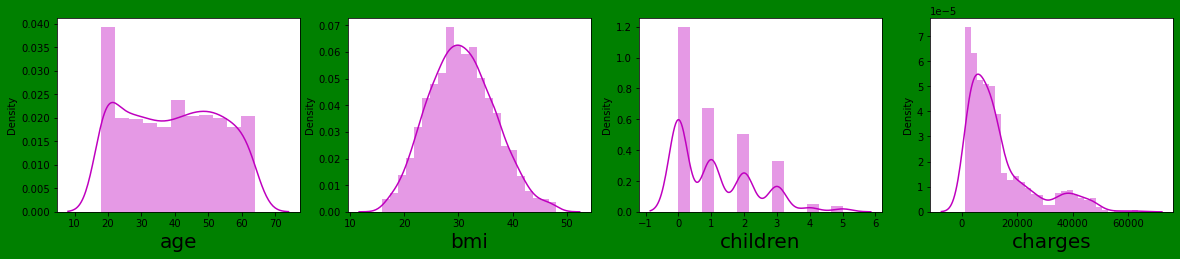

In [44]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

for i in numerical_col:   
    if plotnumber<=5:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [45]:
#The data in 'bmi' is evenly distributed after removing outliers

In [46]:
#Checking skewness


df.skew()

age         0.052714
bmi         0.205541
children    0.934451
charges     1.517177
dtype: float64

In [47]:
#'children' and 'charges' have skewness but we do not check for skewness in target variable

In [48]:
#Removing skewness using cuberoot

df['children']=np.cbrt(df['children'])

In [49]:
df.skew()

age         0.052714
bmi         0.205541
children   -0.099737
charges     1.517177
dtype: float64

In [50]:
#Skewness removed

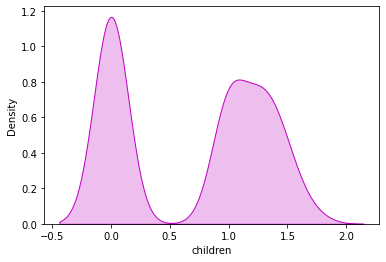

In [51]:
#Lets visualize children column now

sns.distplot(df['children'],color='m',kde_kws={"shade":True},hist=False)
plt.show()

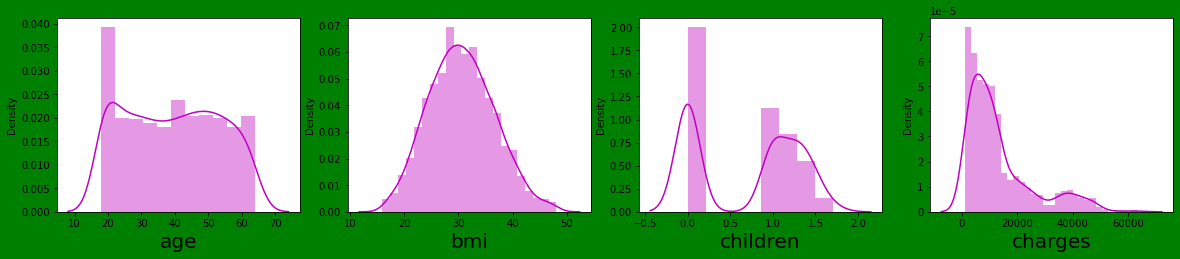

In [52]:
#Let's visualize again

plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

for i in numerical_col:   
    if plotnumber<=5:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding Categorical columns

In [53]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1)) 
        
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0.00000,1.0,3.0,16884.92400
1,18,1.0,33.770,1.00000,0.0,2.0,1725.55230
2,28,1.0,33.000,1.44225,0.0,2.0,4449.46200
3,33,1.0,22.705,0.00000,0.0,1.0,21984.47061
4,32,1.0,28.880,0.00000,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,1.44225,0.0,1.0,10600.54830
1334,18,0.0,31.920,0.00000,0.0,0.0,2205.98080
1335,18,0.0,36.850,0.00000,0.0,2.0,1629.83350
1336,21,0.0,25.800,0.00000,0.0,3.0,2007.94500


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   int64  
 1   sex       1333 non-null   float64
 2   bmi       1333 non-null   float64
 3   children  1333 non-null   float64
 4   smoker    1333 non-null   float64
 5   region    1333 non-null   float64
 6   charges   1333 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 83.3 KB


In [55]:
#No object dtype present now

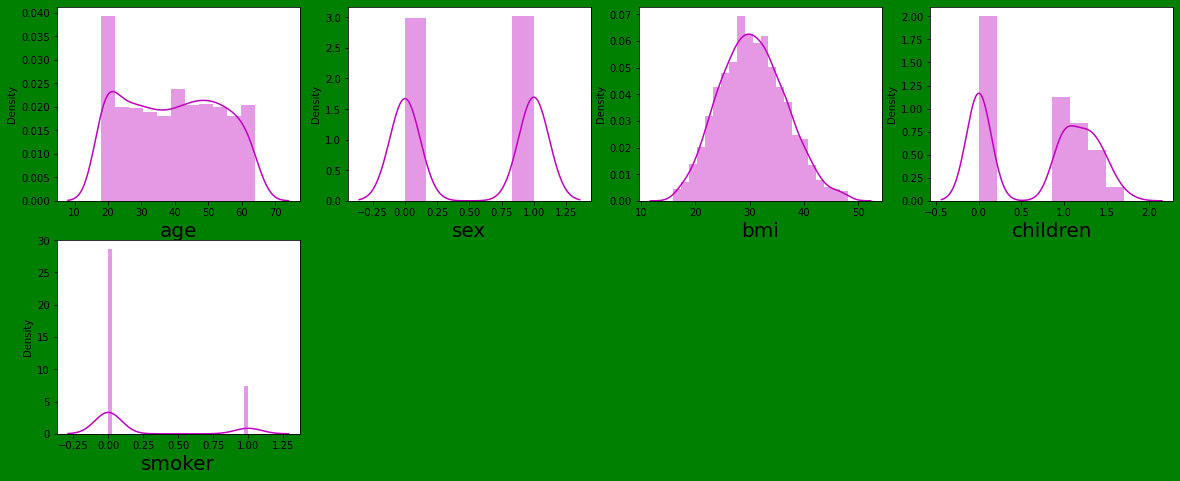

In [56]:
#Let's visualize again

plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

for i in df.columns:   
    if plotnumber<=5:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [57]:
df.describe() #Statistical representation 

,age,sex,bmi,children,smoker,region,charges
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.249062,0.503376,30.601564,0.691132,0.204801,1.514629,13274.344476
std,14.028963,0.500176,6.003179,0.617836,0.403708,1.106548,12090.004775
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4747.052900
50%,39.000000,1.000000,30.305000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.600000,1.259921,0.000000,2.000000,16657.717450
max,64.000000,1.000000,48.070000,1.709976,1.000000,3.000000,63770.428010


### Correlation

In [58]:
#Now we will check correlation with feature variables

df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017987,0.118978,0.048702,-0.024390,0.002473,0.300658
sex,-0.017987,1.000000,0.037046,0.017988,0.076510,0.003641,0.057923
bmi,0.118978,0.037046,1.000000,0.019938,0.002264,0.155889,0.200868
children,0.048702,0.017988,0.019938,1.000000,0.010043,0.014176,0.070716
smoker,-0.024390,0.076510,0.002264,0.010043,1.000000,-0.002510,0.786519
region,0.002473,0.003641,0.155889,0.014176,-0.002510,1.000000,-0.006743
charges,0.300658,0.057923,0.200868,0.070716,0.786519,-0.006743,1.000000


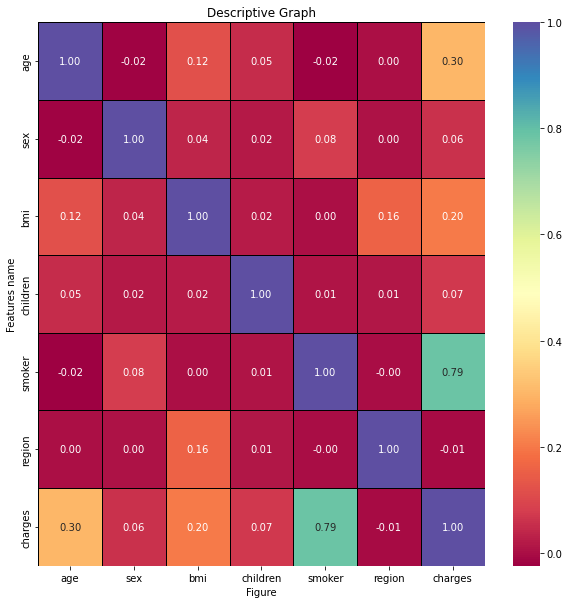

In [59]:
#Visualizing it on the heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=1,linecolor='black',cmap='Spectral')
plt.xlabel("Figure")
plt.ylabel("Features name")
plt.title("Descriptive Graph")
plt.show()

'charges' have a high positive correlation with 'smoker'. Other than that all the independent variables share low to moderate correlation with each other.

In [60]:
#Checking the correlation of target variable only

df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.786519
age         0.300658
bmi         0.200868
children    0.070716
sex         0.057923
region     -0.006743
Name: charges, dtype: float64

In [61]:
#'smoker' has a high positive correlation with the target variable

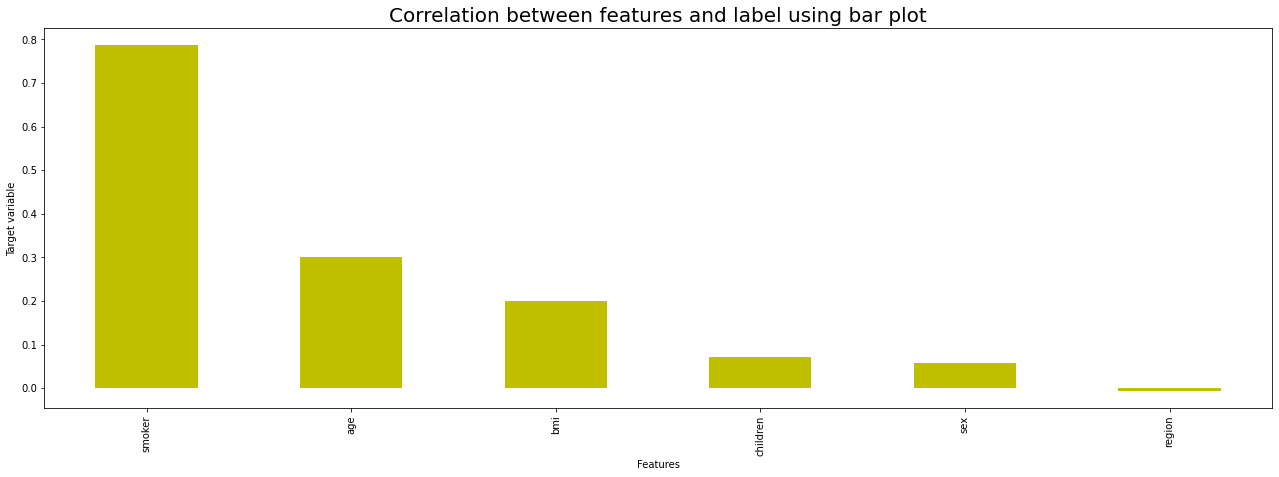

In [62]:
#Visualizing the correlation between the features and the label using bar plot

plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='y')
plt.title("Correlation between features and label using bar plot",fontsize=20)
plt.xlabel("Features")
plt.ylabel("Target variable")
plt.show()

### Seperating features and label

In [63]:
x=df.drop(['charges'],axis=1)
y=df["charges"]

In [64]:
print("Feature dimensions:",x.shape)
print("Target dimensions:",y.shape)

Feature dimensions: (1333, 6)
Target dimensions: (1333,)


### Feature scaling using standard scalarisation

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.443917,-1.006775,-0.450191,-1.119053,1.970478,1.342851
1,-1.515225,0.993271,0.527991,0.500107,-0.507491,0.438800
2,-0.802147,0.993271,0.399678,1.216180,-0.507491,0.438800
3,-0.445607,0.993271,-1.315891,-1.119053,-0.507491,-0.465250
4,-0.516915,0.993271,-0.286883,-1.119053,-0.507491,-0.465250
...,...,...,...,...,...,...
1328,0.766626,0.993271,0.061396,1.216180,-0.507491,-0.465250
1329,-1.515225,-1.006775,0.219705,-1.119053,-0.507491,-1.369301
1330,-1.515225,-1.006775,1.041245,-1.119053,-0.507491,0.438800
1331,-1.301302,-1.006775,-0.800137,-1.119053,-0.507491,1.342851


### Checking Variance Inflation Factor

In [66]:
#Checking Vif in every scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,1.017995,age
1,1.008016,sex
2,1.041656,bmi
3,1.003161,children
4,1.006537,smoker
5,1.025348,region


In [67]:
#VIF is very low which shows less or no correlation between the columns

### Modelling

In [68]:
#Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

### Creating train test split

In [69]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is:",maxAccu,"on random state",maxRS)

Maximum R2 score is: 0.7962609253914421 on random state 12


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS) 

In [71]:
#Importing all the regressor models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [72]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2 score:",r2_score(y_test,pred_LR))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score: 0.7962609253914421
R2 score on training data: 72.81131157569803
Mean Absolute Error: 3753.773063646542
Mean Squared Error: 31448685.091901764
Root Mean Squared Error: 5607.912721494671


In [73]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2 score:",r2_score(y_test,pred_RFR))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score: 0.8758125991317799
R2 score on training data: 97.36693890340872
Mean Absolute Error: 2496.916869981999
Mean Squared Error: 19169275.55399024
Root Mean Squared Error: 4378.273124645177


In [74]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score:",r2_score(y_test,pred_knn))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_knn))
print("Mean Squared Error:",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.8448536745330859
R2 score on training data: 85.10468564711168
Mean Absolute Error: 3002.7506423675
Mean Squared Error: 23948022.450523768
Root Mean Squared Error: 4893.671673756196


In [75]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2 score:",r2_score(y_test,pred_GBR))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 score: 0.8974279729639565
R2 score on training data: 88.85960533408054
Mean Absolute Error: 2363.995631779593
Mean Squared Error: 15832777.211205969
Root Mean Squared Error: 3979.042247979527


In [76]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print("R2 score:",r2_score(y_test,pred_lasso))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error:",mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score: 0.7962464142185226
R2 score on training data: 72.81130708347254
Mean Absolute Error: 3753.830338607993
Mean Squared Error: 31450925.002475314
Root Mean Squared Error: 5608.112427767057


In [77]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rd))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_rd))
print("Mean Squared Error:",mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score: 0.7961400114897492
R2 score on training data: 72.81122674511182
Mean Absolute Error: 3755.612758594204
Mean Squared Error: 31467349.077810593
Root Mean Squared Error: 5609.576550668561


In [78]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_dtr))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error:",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score: 0.7683915489352784
R2 score on training data: 99.80333070000582
Mean Absolute Error: 2607.5411885350004
Mean Squared Error: 35750536.592707284
Root Mean Squared Error: 5979.175243518732


In [79]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_svr))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error:",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score: -0.06777354772940769
R2 score on training data: -9.942241847165768
Mean Absolute Error: 8194.707314161997
Mean Squared Error: 164819017.2480266
Root Mean Squared Error: 12838.185901755225


In [80]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_etr))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error:",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score: 0.8660029743985556
R2 score on training data: 99.80333070000582
Mean Absolute Error: 2374.096118116374
Mean Squared Error: 20683466.19070349
Root Mean Squared Error: 4547.907891624839


In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
#Checking cvs for every model
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.76217056 0.70727611 0.77553152 0.73368736 0.75419473]
0.746572053409159
Difference between R2 score and CVS is: 4.968887198228311


In [105]:
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.85114884 0.77230074 0.86691355 0.82969565 0.85205616]
0.8344229891952478
Difference between R2 score and CVS is: 4.138960993653207


In [106]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_knn)-score.mean())*100)

[0.82892623 0.75648026 0.83857008 0.79896482 0.81552984]
0.807694247678322
Difference between R2 score and CVS is: 3.715942685476392


In [107]:
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.87374205 0.7982106  0.88830683 0.8476433  0.85970761]
0.8535220767290536
Difference between R2 score and CVS is: 4.390589623490293


In [108]:
score=cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_lasso)-score.mean())*100)

[0.76217657 0.70731285 0.77551103 0.73368204 0.75420315]
0.7465771264583931
Difference between R2 score and CVS is: 4.966928776012947


In [109]:
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_rd)-score.mean())*100)

[0.76217525 0.70738509 0.77541684 0.73374572 0.75416617]
0.7465778142827637
Difference between R2 score and CVS is: 4.956219720698551


In [110]:
score=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_dtr)-score.mean())*100)

[0.76359461 0.68828707 0.73461659 0.72249475 0.67487824]
0.7167742531397556
Difference between R2 score and CVS is: 5.161729579552277


In [111]:
score=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_svr)-score.mean())*100)

[-0.10949895 -0.10855865 -0.07304468 -0.10360654 -0.10518372]
-0.09997851004335909
Difference between R2 score and CVS is: 3.2204962313951397


In [112]:
score=cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_etr)-score.mean())*100)

[0.8384724  0.74556432 0.84493612 0.80988242 0.83857822]
0.8154866949944596
Difference between R2 score and CVS is: 5.051627940409597


In the models where the difference is coming high it means there is over fitting problem. Which means that the model is performing well on the training data but not very well on the unseen data.

In [91]:
#From the difference we conclude DecisionTreeRegressor is the best performing model

### HyperParameter tuning

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
param={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
      'splitter':['best','random'],
      'max_depth':[0,10,20],
      'max_features':['auto','sqrt','log2'],
      'max_leaf_nodes':[10,20,30]}

In [94]:
gscv=GridSearchCV(DecisionTreeRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [0, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30],
                         'splitter': ['best', 'random']})

In [95]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': 30,
 'splitter': 'random'}

In [96]:
Model=DecisionTreeRegressor(criterion='friedman_mse',
 max_depth= 20,
 max_features= 'auto',
 max_leaf_nodes= 20,
 splitter= 'best')

In [97]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: 0.8701085161106773
Mean Absolute Error: 2655.361547244005
Mean Squared Error: 20049744.413551763
Root Mean Squared Error: 4477.694095575507


In [98]:
import pickle
filename='Medical Cost Personal Insurance Project.pkl'
pickle.dump(Model,open(filename, 'wb'))  #saved model

In [99]:
#loading the model

loaded_model=pickle.load(open('Medical Cost Personal Insurance Project.pkl','rb'))  #read binary mode
result=loaded_model.score(x_test,y_test)
print(result*100)

87.01085161106774


After loading the trained model using pickle.load(), we then use the score() method of the model to evaluate its performance on the test data.

In [100]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","original"])   
conclusion

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Predicted,5645.726859,8472.54492,13205.060824,3487.94288,3487.94288,6618.404704,5645.726859,18414.072684,5645.726859,15061.644739,...,45254.398813,5645.726859,3487.94288,5645.726859,5645.726859,3487.94288,5645.726859,10605.721421,3487.94288,13205.060824
original,5708.867000,8310.83915,27322.733860,2866.09100,1146.79660,5267.818150,4032.240700,16115.304500,12609.887020,13429.035400,...,48673.558800,4670.640000,2755.02095,4243.590050,4349.462000,1256.29900,6128.797450,8442.667000,2842.76075,11363.283200


In [101]:
conclusion_vertical = conclusion.transpose()

In [102]:
conclusion_vertical

,Predicted,original
0,5645.726859,5708.86700
1,8472.544920,8310.83915
2,13205.060824,27322.73386
3,3487.942880,2866.09100
4,3487.942880,1146.79660
...,...,...
395,3487.942880,1256.29900
396,5645.726859,6128.79745
397,10605.721421,8442.66700
398,3487.942880,2842.76075
